# Analysis of large-scale kinase acitivity predictions

Notebook to reproduce analysis and figures of the [hyperlink_tbd](hyperlink_to_com) paper:
- analysis of the [datasets](#Dataset)
- analysis of the [modelling](#qsar-analysis)

In [1]:
import pandas as pd
from src.analysis_utils import *

%reload_ext autoreload
%autoreload 2

# Dataset

In [2]:
# Loading data
data_dir = 'data/datasets/'
rges200 = pd.read_csv(data_dir + 'kinase200_RGES.csv.gz')
rges1000 = pd.read_csv(data_dir + 'kinase1000_RGES.csv.gz')
dgbc200 = pd.read_csv(data_dir + 'kinase200_DGBC.csv.gz')
dgbc1000 = pd.read_csv(data_dir + 'kinase1000_DGBC.csv.gz')

## Stats per dataset

In [3]:
dataset_stats(rges1000)

Kinases: 66
Molecules: 70574
Datapoints: 137962 
Density: 2.96


In [4]:
dataset_stats(dgbc1000)

Kinases: 66
Molecules: 70574
Datapoints: 137962 
Density: 2.96


In [5]:
dataset_stats(rges200)

Kinases: 198
Molecules: 82983
Datapoints: 216858 
Density: 1.32


In [6]:
dataset_stats(dgbc200)

Kinases: 198
Molecules: 82983
Datapoints: 216858 
Density: 1.32


## Balance 

In [44]:
rges1000_b = dataset_balance(rges1000)
rges1000_b['Dataset'] = 'kinase1000'
rges1000_b['Split'] = 'RGES'

train: 79.9 +/- 0.6
valid: 10.2 +/- 0.5
test: 9.8 +/- 0.5


In [45]:
dgbc1000_b = dataset_balance(dgbc1000)
dgbc1000_b['Dataset'] = 'kinase1000'
dgbc1000_b['Split'] = 'DGBC'

train: 80.1 +/- 0.7
valid: 9.6 +/- 0.7
test: 10.3 +/- 0.8


In [46]:
rges200_b = dataset_balance(rges200)
rges200_b['Dataset'] = 'kinase200'
rges200_b['Split'] = 'RGES'

train: 79.4 +/- 0.9
valid: 9.9 +/- 0.6
test: 10.7 +/- 0.9


In [47]:
dgbc200_b = dataset_balance(dgbc200)
dgbc200_b['Dataset'] = 'kinase200'
dgbc200_b['Split'] = 'DGBC'


train: 80.1 +/- 1.8
valid: 10.1 +/- 1.5
test: 9.8 +/- 1.4


## Activity

In [48]:
rges1000_a = rges1000.drop(['SMILES', 'InChIKey', 'MinInterSetTd'], axis=1).melt(id_vars=['Subset']).dropna()
rges1000_a['Split'] = 'RGES'
rges1000_a['Dataset'] = 'kinase1000'

rges200_a = rges200.drop(['SMILES', 'InChIKey', 'MinInterSetTd'], axis=1).melt(id_vars=['Subset']).dropna()
rges200_a['Split'] = 'RGES'
rges200_a['Dataset'] = 'kinase200'

dgbc1000_a = dgbc1000.drop(['SMILES', 'InChIKey', 'MinInterSetTd'], axis=1).melt(id_vars=['Subset']).dropna()
dgbc1000_a['Split'] = 'DGBC'
dgbc1000_a['Dataset'] = 'kinase1000'

dgbc200_a = dgbc200.drop(['SMILES', 'InChIKey', 'MinInterSetTd'], axis=1).melt(id_vars=['Subset']).dropna()
dgbc200_a['Split'] = 'DGBC'
dgbc200_a['Dataset'] = 'kinase200'

## Fig 2 - Kinase200 charasterictics

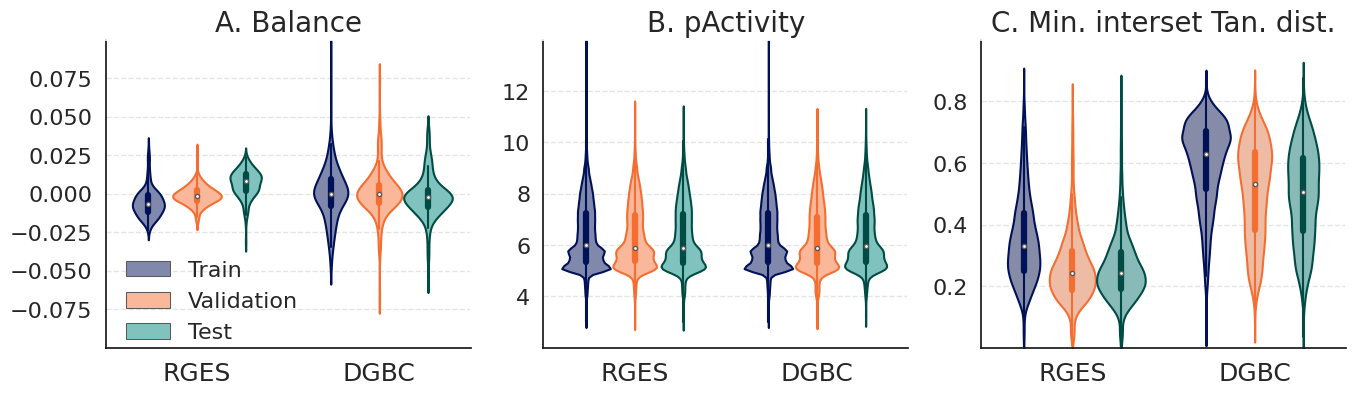

In [149]:
data_balance = pd.concat([rges200_b, dgbc200_b])
data_activity = pd.concat([rges200_a, dgbc200_a], axis=0).rename(columns={'value': 'pActivity'})

rges200['Split'] = 'RGES'
dgbc200['Split'] = 'DGBC'
data_tanimoto = pd.concat([rges200, dgbc200], axis=0)

plot_dataset_distribution(data_balance, data_activity, data_tanimoto, 'figures/fig2.svg')

## Fig S2 - Kinase1000 characteristics

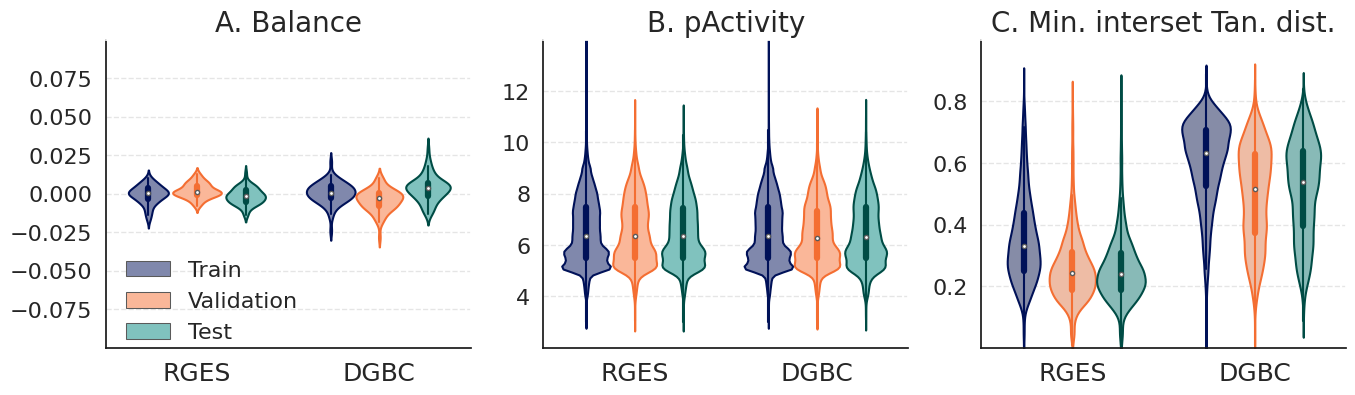

In [150]:
data_balance = pd.concat([rges1000_b, dgbc1000_b])
data_activity = pd.concat([rges1000_a, dgbc1000_a], axis=0).rename(columns={'value': 'pActivity'})

rges1000['Split'] = 'RGES'
dgbc1000['Split'] = 'DGBC'
data_tanimoto = pd.concat([rges1000, dgbc1000], axis=0)

plot_dataset_distribution(data_balance, data_activity, data_tanimoto, 'figures/figS2.svg')

# QSAR Analysis

## Load data & compute stats per kinase

In [7]:
df_metrics = get_metrics_per_target_for_all_models()

Pass - no Predictions/CP/ST/kinase1000/RGES/HyperOpt/predictions.csv.gz file
Pass - no Predictions/CP/ST/kinase1000/DGBC/HyperOpt/predictions.csv.gz file


In [3]:
# Fraction of kinases for which R2 > 0.4 for the best performing model PB/MT/opt
df = df_metrics[(df_metrics.Name == 'PB/MT/opt') & (df_metrics.Split == 'DGBC') & (df_metrics.Metric == 'R2') & (df_metrics.Dataset == 'kinase200') & (df_metrics.Value > 0.4)]
df.shape[0] / 198

0.18181818181818182

In [4]:
df_metrics

,Target,Split,Model,Mode,Dataset,Task,Metric,Value,Density,Name
0,O14757_WT,RGES,RF,Default,kinase1000,ST,R2,0.690948,2.574450,RF/ST
1,O14757_WT,RGES,RF,Default,kinase1000,ST,RMSE,0.726646,2.574450,RF/ST
2,O14965_WT,RGES,RF,Default,kinase1000,ST,R2,0.704968,3.701642,RF/ST
3,O14965_WT,RGES,RF,Default,kinase1000,ST,RMSE,0.779766,3.701642,RF/ST
4,O15530_WT,RGES,RF,Default,kinase1000,ST,R2,0.752076,1.850821,RF/ST
...,...,...,...,...,...,...,...,...,...,...
15571,Q9Y463_WT,DGBC,pQSAR,DataLeakage,kinase200,MT,RMSE,0.518104,0.856225,pQSAR/dl
15572,Q9Y4K4_WT,DGBC,pQSAR,DataLeakage,kinase200,MT,R2,0.414637,0.772981,pQSAR/dl
15573,Q9Y4K4_WT,DGBC,pQSAR,DataLeakage,kinase200,MT,RMSE,0.615472,0.772981,pQSAR/dl
15574,Q9Y6M4_WT,DGBC,pQSAR,DataLeakage,kinase200,MT,R2,0.672590,0.642169,pQSAR/dl


## Stats per model

In [10]:
df_stats = compute_statistics_of_metrics(df_metrics)

In [11]:
df = df_stats[ (df_stats.Dataset == 'kinase200') ]

df_formated = pd.DataFrame()

for model in ['RF/ST/opt', 'XGB/ST/opt', 'PB/MT/opt', 'CP/ST/opt', 'CP/MT/opt', 'CP iMean/MT/opt', 'CP iRF/MT/opt', 'pQSAR']:
    df_tmp = df[(df.Name == model)]
    formated = pd.DataFrame({
        'Name' : model,
        'R2 - Median - RGES' : df_tmp[(df_tmp.Split == 'RGES') & (df_tmp.Metric == 'R2')].Median.values[0],
        'R2 - Median - DGBC' : df_tmp[(df_tmp.Split == 'DGBC') & (df_tmp.Metric == 'R2')].Median.values[0],
        'R2 - Mean - RGES' : df_tmp[(df_tmp.Split == 'RGES') & (df_tmp.Metric == 'R2')].Mean.values[0],
        'R2 - Std - RGES' : df_tmp[(df_tmp.Split == 'RGES') & (df_tmp.Metric == 'R2')].Std.values[0],
        'R2 - Mean - DGBC' : df_tmp[(df_tmp.Split == 'DGBC') & (df_tmp.Metric == 'R2')].Mean.values[0],
        'R2 - Std - DGBC' : df_tmp[(df_tmp.Split == 'DGBC') & (df_tmp.Metric == 'R2')].Std.values[0],
        
        'RMSE - Median - RGES' : df_tmp[(df_tmp.Split == 'RGES') & (df_tmp.Metric == 'RMSE')].Median.values[0],
        'RMSE - Median - DGBC' : df_tmp[(df_tmp.Split == 'DGBC') & (df_tmp.Metric == 'RMSE')].Median.values[0],
        'RMSE - Mean - RGES' : df_tmp[(df_tmp.Split == 'RGES') & (df_tmp.Metric == 'RMSE')].Mean.values[0],
        'RMSE - Std - RGES' : df_tmp[(df_tmp.Split == 'RGES') & (df_tmp.Metric == 'RMSE')].Std.values[0],
        'RMSE - Mean - DGBC' : df_tmp[(df_tmp.Split == 'DGBC') & (df_tmp.Metric == 'RMSE')].Mean.values[0],
        'RMSE - Std - DGBC' : df_tmp[(df_tmp.Split == 'DGBC') & (df_tmp.Metric == 'RMSE')].Std.values[0],
    }, index=[0])
    df_formated = pd.concat([df_formated, formated], ignore_index=True)

In [12]:
# Show df_formated with two decimals
df_formated.round(2)


,Name,R2 - Median - RGES,R2 - Median - DGBC,R2 - Mean - RGES,R2 - Std - RGES,R2 - Mean - DGBC,R2 - Std - DGBC,RMSE - Median - RGES,RMSE - Median - DGBC,RMSE - Mean - RGES,RMSE - Std - RGES,RMSE - Mean - DGBC,RMSE - Std - DGBC
0,RF/ST/opt,0.59,0.17,0.54,0.22,0.15,0.32,0.56,0.75,0.55,0.13,0.77,0.30
1,XGB/ST/opt,0.58,0.19,0.51,0.27,0.12,0.64,0.55,0.73,0.56,0.13,0.76,0.30
2,PB/MT/opt,0.61,0.23,0.57,0.21,0.20,0.28,0.53,0.72,0.53,0.13,0.75,0.29
3,CP/ST/opt,0.48,0.05,0.42,0.30,0.03,0.40,0.61,0.80,0.61,0.16,0.82,0.29
4,CP/MT/opt,0.58,0.15,0.52,0.24,0.08,0.40,0.57,0.76,0.56,0.14,0.78,0.25
5,CP iMean/MT/opt,0.23,-0.07,0.02,0.68,-0.37,0.99,0.77,0.86,0.77,0.13,0.89,0.23
6,CP iRF/MT/opt,0.57,0.18,0.54,0.22,0.14,0.33,0.56,0.76,0.56,0.13,0.78,0.31
7,pQSAR,0.39,-0.03,0.26,0.49,-0.46,2.14,0.67,0.85,0.69,0.21,0.94,0.50


### Effect of split

In [155]:
a = df_stats[(df_stats.Dataset == 'kinase200') & (df_stats.Split == 'RGES') & (df_stats.Metric == 'R2')].Median.mean()
b = df_stats[(df_stats.Dataset == 'kinase200') & (df_stats.Split == 'DGBC') & (df_stats.Metric == 'R2')].Median.mean()

c = df_stats[(df_stats.Dataset == 'kinase200') & (df_stats.Split == 'RGES') & (df_stats.Metric == 'RMSE')].Median.mean()
d = df_stats[(df_stats.Dataset == 'kinase200') & (df_stats.Split == 'DGBC') & (df_stats.Metric == 'RMSE')].Median.mean()

print('Difference in median R2 between RGES and DGBC: {:.1f}'.format(b-a))
print('Difference in median RMSE between RGES and DGBC: {:.1f}'.format(d-c))

Difference in median R2 between RGES and DGBC: -0.3
Difference in median RMSE between RGES and DGBC: 0.2


### Effect of hyperparameter optimisation

In [156]:
hpo_diff = compute_effect_of_hyperparam_opt(df_stats)

Average difference between default and hyperopt of R2 median values for RGES split = 0.12
Average difference between default and hyperopt of RMSE median values for RGES split = -0.07
Average difference between default and hyperopt of R2 median values for DGBC split = 0.07
Average difference between default and hyperopt of RMSE median values for DGBC split = -0.03


### Effect of multi-task

In [157]:
df = df_stats[df_stats.Mode == 'HyperOpt']

for split in ['RGES', 'DGBC']:
    for metric in ['R2', 'RMSE']:
        
        a = df[(df.Split == split) & (df.Metric == metric) & (df.Model == 'CP') & (df.Task == 'MT')].Mean.values[0]
        b = df[(df.Split == split) & (df.Metric == metric) & (df.Model == 'CP') & (df.Task == 'ST')].Mean.values[0]
        print(f'Difference of median {metric} for {split} between ST- and MT- CP: {a-b:.2f}')
        a = df[(df.Split == split) & (df.Metric == metric) & (df.Model == 'PB') & (df.Task == 'MT')].Mean.values[0]
        b = df[(df.Split == split) & (df.Metric == metric) & (df.Model == 'XGB') & (df.Task == 'ST')].Mean.values[0]
        print(f'Difference of median {metric} for {split} between ST-XGB and MT-PB: {a-b:.2f}')
        print('--')


Difference of median R2 for RGES between ST- and MT- CP: 0.11
Difference of median R2 for RGES between ST-XGB and MT-PB: 0.06
--
Difference of median RMSE for RGES between ST- and MT- CP: -0.05
Difference of median RMSE for RGES between ST-XGB and MT-PB: -0.03
--
Difference of median R2 for DGBC between ST- and MT- CP: 0.05
Difference of median R2 for DGBC between ST-XGB and MT-PB: 0.08
--
Difference of median RMSE for DGBC between ST- and MT- CP: -0.04
Difference of median RMSE for DGBC between ST-XGB and MT-PB: -0.01
--


## Fig 3 - Model performance - kinase200

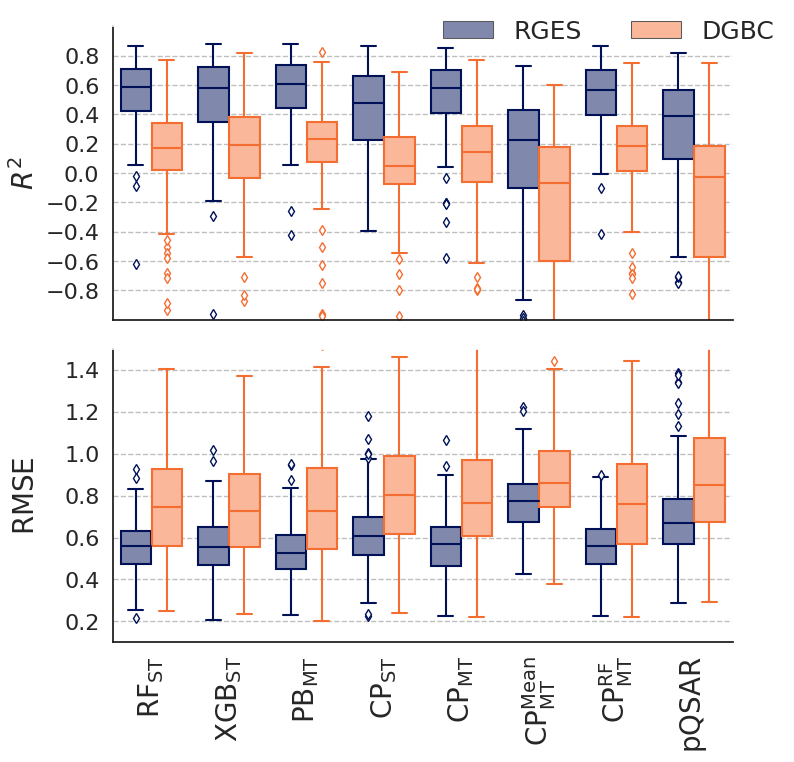

In [160]:
# Main performance plot for kinase200 dataset
df = df_metrics[(df_metrics.Dataset == 'kinase200') & (df_metrics.Name.isin(['RF/ST/opt', 'XGB/ST/opt', 'PB/MT/opt', 'CP/ST/opt', 'CP/MT/opt', 'CP iMean/MT/opt', 'CP iRF/MT/opt', 'pQSAR']))]
xtickslabels = [r'$\mathrm{RF_{ST}}$', r'$\mathrm{XGB_{ST}}$', r'$\mathrm{PB_{MT}}$', r'$\mathrm{CP_{ST}}$', r'$\mathrm{CP_{MT}}$', r'$\mathrm{CP_{MT}^{Mean}}$', r'$\mathrm{CP_{MT}^{RF}}$', r'$\mathrm{pQSAR}$']
performance_plot(df, xtickslabels, 'figures/fig3.svg')

## Fig S3 - Model performance - kinase1000

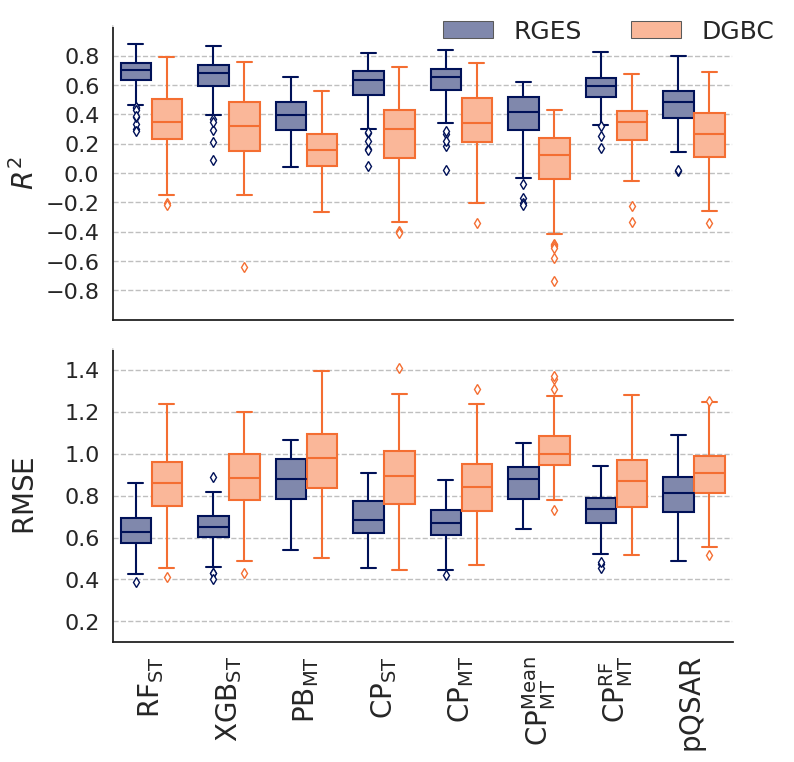

In [161]:
# Main performance plot for kinase1000 dataset
df = df_metrics[(df_metrics.Dataset == 'kinase1000') & (df_metrics.Name.isin(['RF/ST', 'XGB/ST', 'PB/MT', 'CP/ST', 'CP/MT', 'CP iMean/MT', 'CP iRF/MT', 'pQSAR']))]
performance_plot(df, xtickslabels, 'figures/figS3.svg' )

## Fig 4 - PB/MT performance as function of density

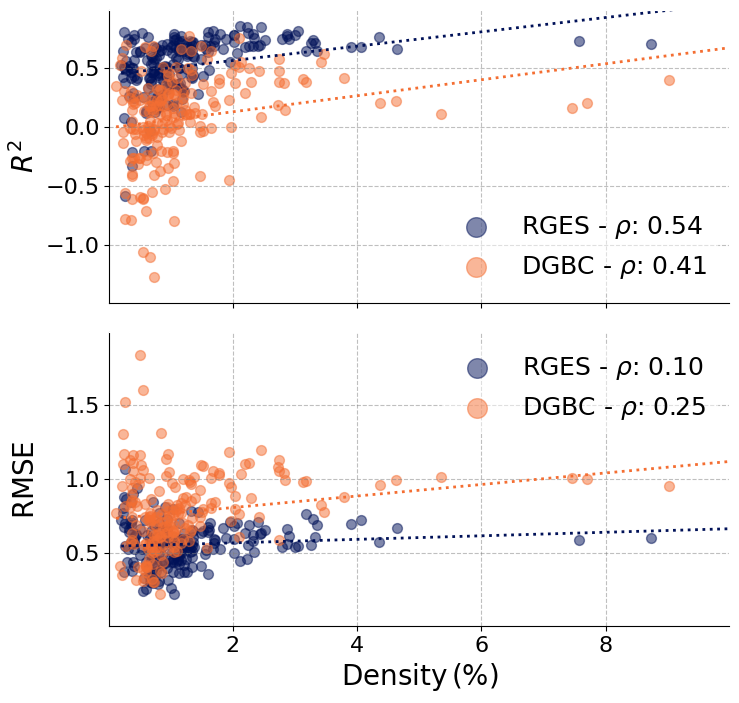

In [3]:
df = df_metrics[(df_metrics.Dataset == 'kinase200') & (df_metrics.Model == 'CP') & (df_metrics.Task == 'MT') & (df_metrics.Mode == 'HyperOpt')]
plot_effect_density(df, 'figures/fig4.svg')

## Fig 5 - Kinase1000 vs. kinase200 performance

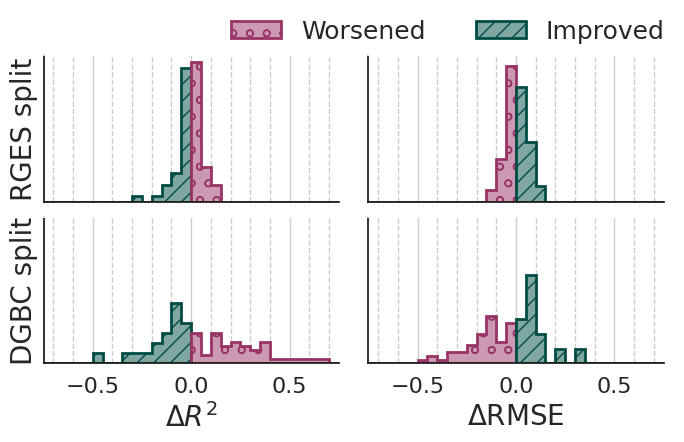

In [178]:
kinase1000_targets = df_metrics[df_metrics.Dataset == 'kinase1000'].Target.unique().tolist()
df = df_metrics[(df_metrics.Model == 'CP') & (df_metrics.Mode == 'HyperOpt') & (df_metrics.Task == 'MT') & (df_metrics.Target.isin(kinase1000_targets))]

plot_effect_datapoints(df, 'figures/fig5.svg')

## Fig S4 - pQSAR implementation validation

In [188]:
pQSAR_metrics = pd.DataFrame()
for split in ['Random', 'Realistic']:
    # Experimental data
    exp = pd.read_csv(f'ModelInputs/Assays/{split}/exp_test.csv.gz')
    # Original predictions
    pred_paper = pd.read_csv(f'ModelInputs/Assays/{split}/pred_test.csv.gz')
    # Our predictions
    pred = pd.read_csv(f'Predictions/pQSAR/MT/Assays/{split}/predictions.csv')

    # Original stats
    metrics = compute_stats(exp, pred_paper)
    metrics['Implementation'] = 'Martin et al.'
    metrics['Split'] = split
    pQSAR_metrics = pd.concat([pQSAR_metrics, metrics], ignore_index=True)

    # # Our stats
    metrics = compute_stats(exp, pred)
    metrics['Implementation'] = 'This work'
    metrics['Split'] = split
    pQSAR_metrics = pd.concat([pQSAR_metrics, metrics], ignore_index=True)

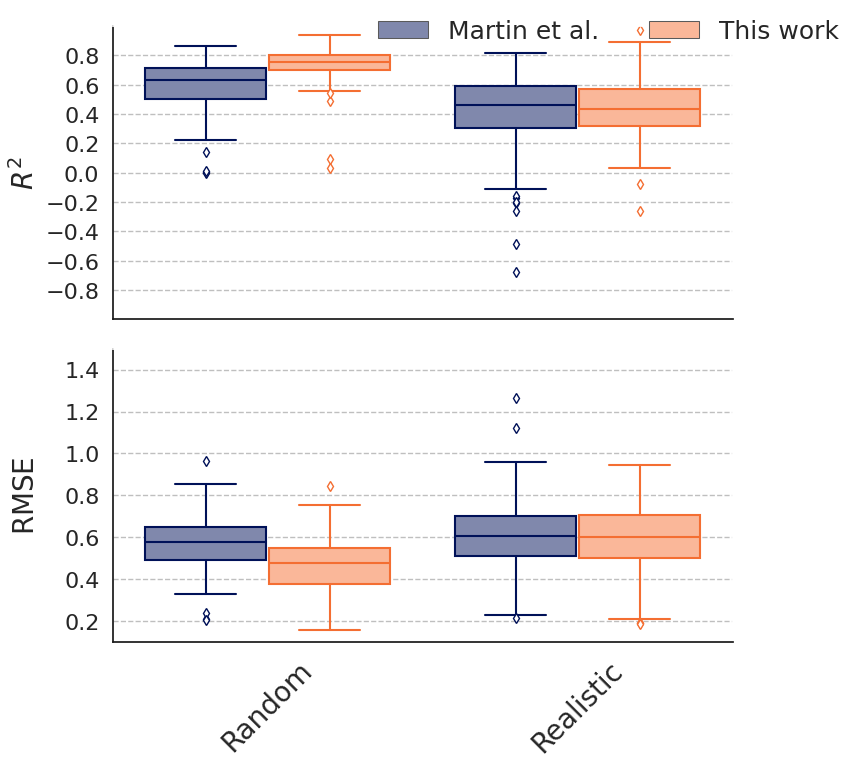

In [189]:
performance_plot(pQSAR_metrics, x='Split', hue='Implementation', fname='figures/figS4.svg')

## Fig 6 - pQSAR data leakage comparison

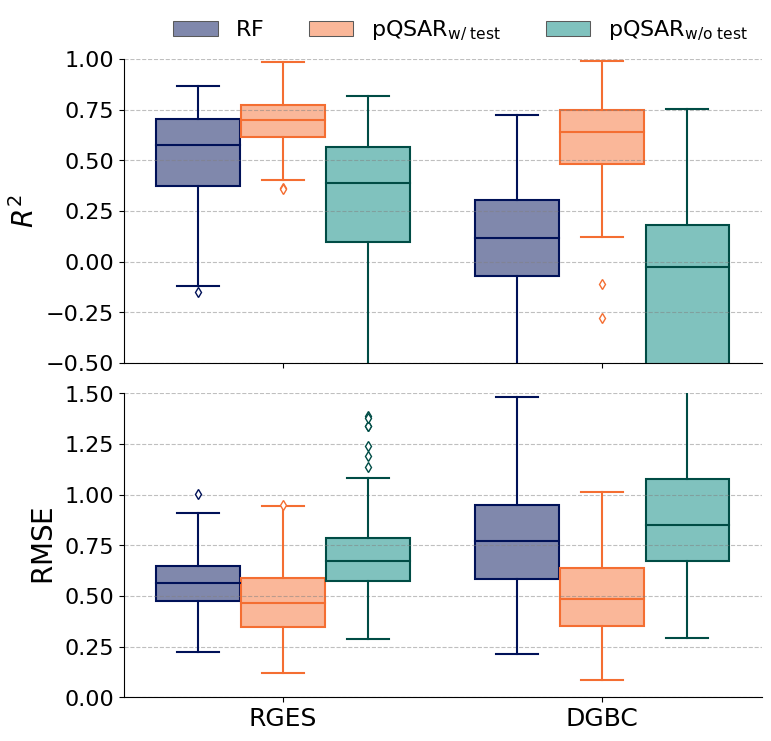

In [8]:
plot_pQSAR_performance(df_metrics, 'figures/fig6.svg')